<a href="https://colab.research.google.com/github/Nastiiasaenko/XAI-Week8/blob/main/XAI_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers umap-learn scikit-learn matplotlib plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained model from the leaderboard (e.g., all-MiniLM-L6-v2)
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Sample text data (feel free to modify or add more sentences)
sentences = [
    "I love machine learning.",
    "Artificial intelligence is the future.",
    "Natural language processing powers chatbots.",
    "I enjoy swimming and playing soccer.",
    "The weather today is sunny.",
    "He is reading a book on AI.",
    "The sunset by the beach is beautiful.",
    "Python is my favorite programming language.",
    "I prefer coffee over tea.",
    "She is baking cookies for the party."
]

# Generate embeddings for the sentences
embeddings = model.encode(sentences)
print(f"Shape of the embedding matrix: {embeddings.shape}")


Shape of the embedding matrix: (10, 384)


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")



PCA explained variance ratio: [0.22717708 0.14803194]


In [ ]:
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=5, n_iter=500, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
import umap

# Reduce to 2D using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


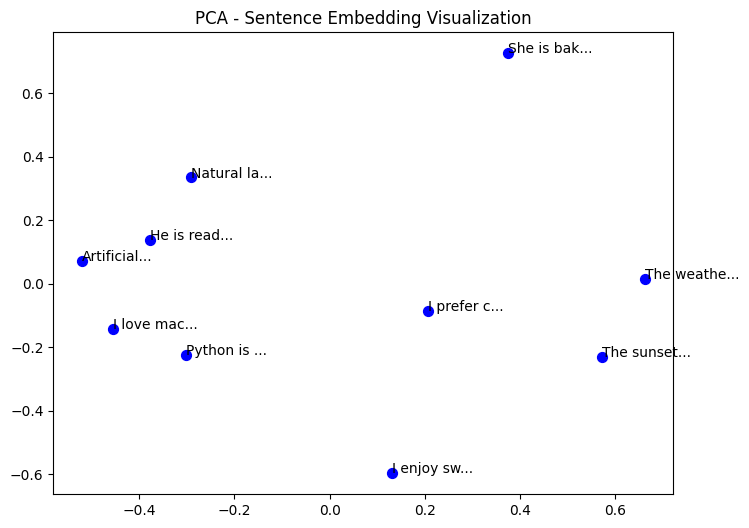

In [ ]:
import matplotlib.pyplot as plt

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c='blue', s=50)
for i, sentence in enumerate(sentences):
    plt.annotate(sentence[:10] + '...', (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.title("PCA - Sentence Embedding Visualization")
plt.show()


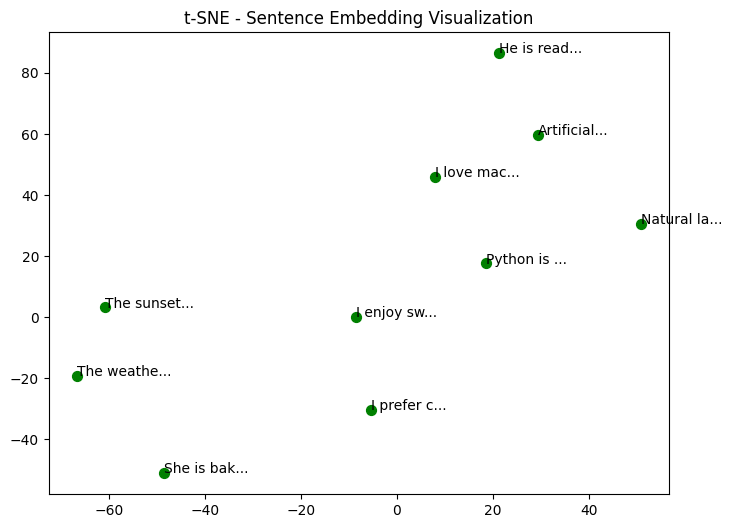

In [ ]:
# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c='green', s=50)
for i, sentence in enumerate(sentences):
    plt.annotate(sentence[:10] + '...', (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))

plt.title("t-SNE - Sentence Embedding Visualization")
plt.show()


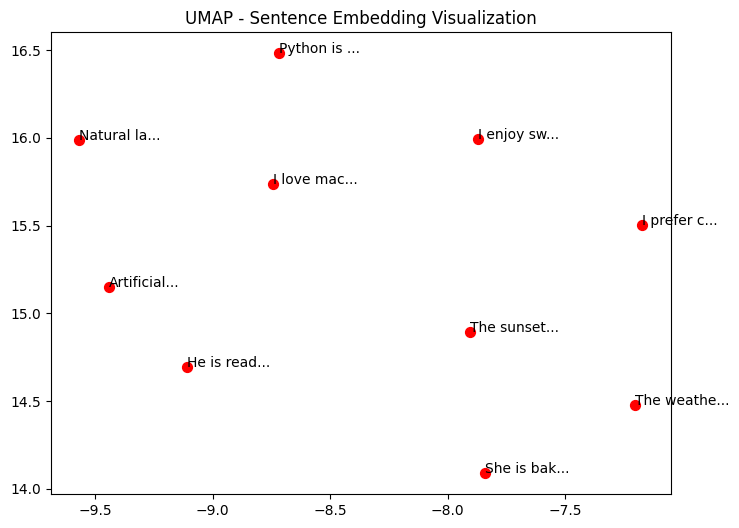

In [ ]:
# Plot UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c='red', s=50)
for i, sentence in enumerate(sentences):
    plt.annotate(sentence[:10] + '...', (embeddings_umap[i, 0], embeddings_umap[i, 1]))

plt.title("UMAP - Sentence Embedding Visualization")
plt.show()
